## TWITTER HASHTAG ANALYSIS FOR "@DeutscheBörse"

In [2]:
import tweepy, codecs   

In [3]:
consumer_key = "cQcOkP6TZjTozZ53"
consumer_secret = "Ro6p8Kb4Ljj9kcI3vdeXlqetaWCZ1O"
access_token ="3224795051-L4U1AiU8QjpcPYVH"
access_token_secret ="FYcR91YXxmUWnCokylrtL"

auth = tweepy.OAuthHandler(consumer_key,consumer_secret)                      
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 


In [4]:
tweetler = api.search(q = "@DeutscheBörse", lang = "en", count = 20000)

TweepError: [{'code': 89, 'message': 'Invalid or expired token.'}]

In [2]:
def hashtag_df(tweetler):
    import pandas as pd
    id_list = [tweet.id for tweet in tweetler]
    df = pd.DataFrame(id_list, columns= ["id"])


    df["text"] = [tweet.text for tweet in tweetler]
    df["created_at"] = [tweet.created_at for tweet in tweetler]
    df["retweeted"] = [tweet.retweeted for tweet in tweetler]
    df["text"] = [tweet. for tweet in tweetler]
    df["source"] = [tweet.source for tweet in tweetler]
    df["retweet_count"] = [tweet.retweet_count for tweet in tweetler]
    df["user_screen_name"] = [tweet.author.screen_name for tweet in tweetler]
    df["user_followers_counts"] = [tweet.author.followers_count for tweet in tweetler]
    df["user_location"] = [tweet.author.location for tweet in tweetler]
    df["Hashtags"] = [tweet.entities.get("hashtags") for tweet in tweetler]
    
    return df

In [21]:
dbg = hashtag_df(tweetler)

In [49]:
dbg["tweet_saat"] = dbg["created_at"].apply(lambda x: x.strftime("%H"))

### which hours "@DeutscheBörse" hastag is used in tweets

(0, 24)

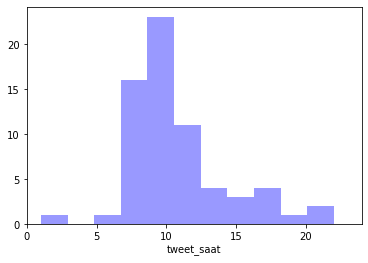

In [53]:
sns.distplot(dbg.tweet_saat,kde = False,color = "blue") #which hours "@DeutscheBörse" hastag is used in tweets
plt.xlim(00,24)

In [55]:
kaynak_freq = dbg.groupby("source").count()["id"]

# People are using Twitter Web Application while sending tweets about "@DeutscheBörse" hastag.


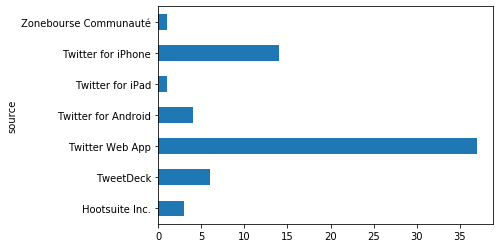

In [56]:
kaynak_freq.plot.barh()  

In [23]:
aa = dbg.copy()

In [24]:
#upper-lower case change
aa["text"] = aa["text"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [25]:
# poinst sign
aa["text"] = aa["text"].str.replace('[^\w\s]','')

In [26]:
#numbers
aa["text"] = aa["text"].str.replace('\d','')

In [27]:
#stopwords
import nltk
from nltk.corpus import stopwords
sw = stopwords.words("english")
aa["text"] = aa["text"].apply(lambda x: " ".join(x for x in x.split() if x not in sw ))

In [28]:
##lemmi
from textblob import Word
aa["text"] = aa["text"].apply(lambda x : " ".join([Word(word).lemmatize() for word in x.split()]))

In [29]:
aa["text"] = aa["text"].str.replace("rt",'')

In [30]:
aa["text"] # Here I cleaned text.

0      madana_hq would like thank deutscheboerse ven...
1                     madana_hq deutscheboerse congrats
2     mojmir_hlinka year constant accusation journal...
3     ok markus braun ceo wirecard stepped least new...
4     company ceo resigned today suspended senior ex...
                            ...                        
61    deutscheboerse go bitcoin brendaneich nntaleb ...
62    deutscheboerse go bitcoin brendaneich nntaleb ...
63    happy bihday subsidiary clearstream clearstrea...
64     madana_hq would like thank deutscheboerse ven...
65     madana_hq would like thank deutscheboerse ven...
Name: text, Length: 66, dtype: object

In [31]:
freq_df = aa["text"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index() # frequency of words

In [57]:
freq_df.columns = ["words","frequency"]

In [58]:
freq_df.groupby("words").count()["frequency"].sort_values(ascending = False)

words
yet             1
f_jan           1
event           1
evidence        1
exalted         1
               ..
network         1
new             1
news            1
nikkeimarket    1
                1
Name: frequency, Length: 305, dtype: int64

In [59]:
freq_df[freq_df.frequency > freq_df.frequency.mean() + freq_df.frequency.std()] ##Reduction according to  std.

,words,frequency
0,madana_hq,9.0
1,online,8.0
2,organizing,8.0
3,atypical,8.0
4,matching,8.0
5,event,8.0
6,venture,8.0
7,deutscheboerse,46.0
8,like,9.0
9,vcs,8.0


In [63]:
freqler = freq_df[freq_df.frequency > freq_df.frequency.mean() + freq_df.frequency.std()]

# Here we can see the visualization of words and which words are most used from people who use "@DeutscheBörse" hashtag

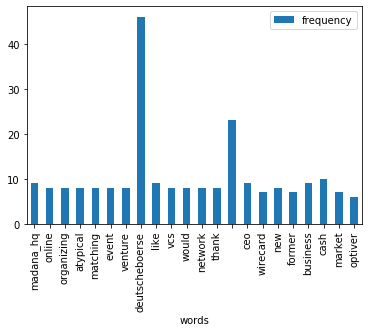

In [64]:
freqler.plot.bar(x = "words", y ="frequency") 

## Word cloud for collected words about deutsch borse.

In [37]:
import numpy as np 
import pandas as pd
from os import path 
from PIL import Image 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt 

In [38]:
text = " ".join(i for i in aa.text)

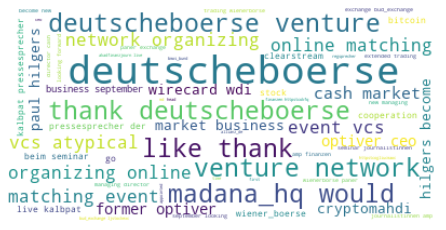

In [39]:
wordcloud = WordCloud(background_color = "white").generate(text)
plt.imshow(wordcloud , interpolation= "bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()                                   

In [84]:
mrkt = np.array(Image.open("Adsız.jpg"))
%config InlineBackend.figure_format = "retina"

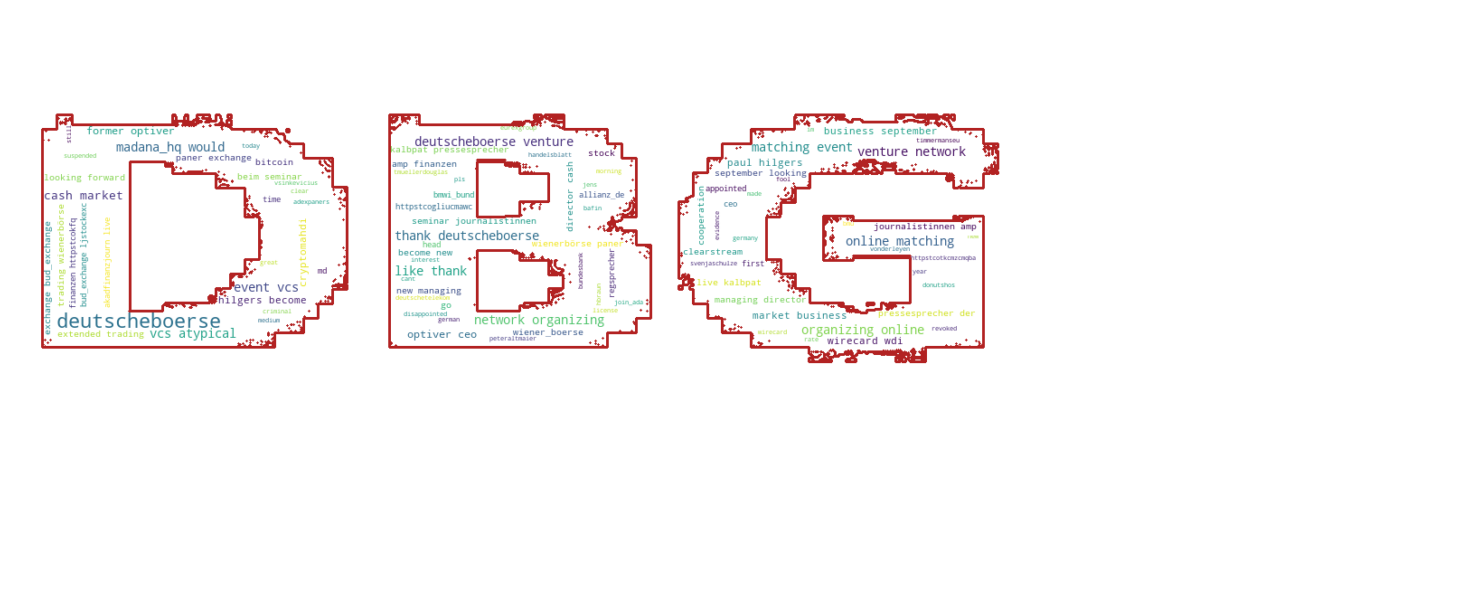

In [87]:
%config InlineBackend.figure_format = "retina"
wc = WordCloud(background_color= "white",
                            max_words=100,
                            mask=mrkt,
                            contour_width=3,
                            contour_color="firebrick")

wc.generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


# Sentiment Analysis.

In [93]:
from textblob import TextBlob
import pandas as pd 
aa1 = aa.copy()

In [94]:
def getSubjectivity(text):

    return TextBlob(text).sentiment.subjectivity

In [95]:
def getPolarity(text):
   
    return  TextBlob(text).sentiment.polarity

In [96]:
aa1['Subjectivity'] = aa1['text'].apply(getSubjectivity)
aa1['Polarity'] = aa1['text'].apply(getPolarity)

In [97]:
def getscore(score):
    if score <0:
        return "negative"
    elif score == 0:
        return "notr"
    else:
        return "positive"   

In [99]:
aa1['Analysis'] = aa1['Polarity'].apply(getscore)

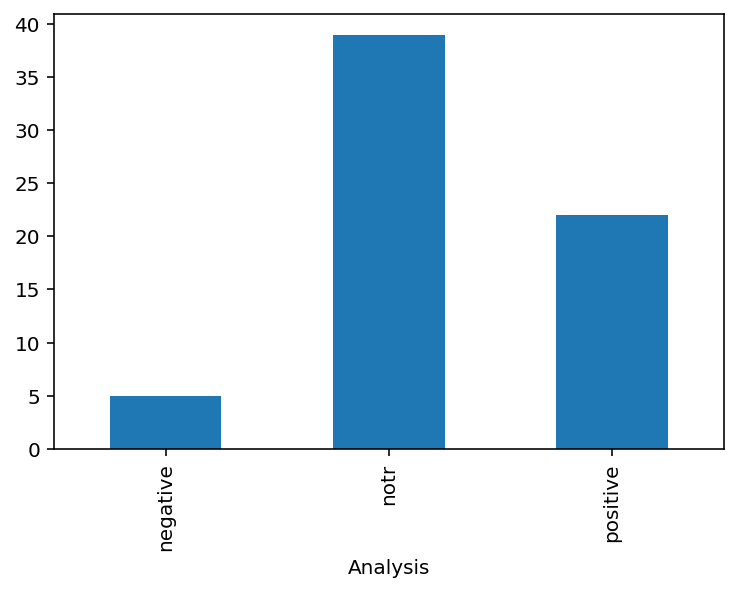

In [101]:
duygu_freq = aa1.groupby("Analysis").count()["id"]
duygu_freq.plot.bar()

## NEGATIVE TWEETS 

In [103]:
 
print('Printing negative:\n')
j=1
sortedDF = aa1.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'negative'):
    print(str(j) + ') '+sortedDF["text"][i])
    print()
    j=j+1

Printing negative:

1)  jc donutshos im disappointed germany made fool german medium handelsblatt reflect

2) deezee cryptomahdi deutscheboerse agreed take long license revoked

3) donutshos im disappointed germany made fool german medium handelsblatt sho httpstcotmszfndlz

4) germantrader deutscheboerse well also criminal bafin didnt investigate request third pay audit httpstcovvazkhoy

5) come conclusion today criminal let stock trade morning opinion httpstcoybbwljgep



## POSITIVE TWEETS

In [104]:
print('Printing positive tweets:\n')
j=1
sortedDF = aa1.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'positive'):
    print(str(j) + ') '+ sortedDF['text'][i])
    print()
    j= j+1

Printing positive tweets:

1) ok markus braun ceo wirecard stepped least new ceo former prosecutor previous httpstcotjwbyvlnlp

2) sound like wirecard wdi management blaming pointing others rather admitting blatan httpstcomrmksctso

3) cryptomahdi deutscheboerse time post none good

4)  akadfinanzjourn live kalbpat pressesprecher der deutscheboerse beim seminar journalistinnen amp finanzen httpstcokfq

5)  akadfinanzjourn live kalbpat pressesprecher der deutscheboerse beim seminar journalistinnen amp finanzen httpstcokfq

6)  akadfinanzjourn live kalbpat pressesprecher der deutscheboerse beim seminar journalistinnen amp finanzen httpstcokfq

7) live kalbpat pressesprecher der deutscheboerse beim seminar journalistinnen amp finanzen httpstcokfqdvwiz

8) great news btcetc bitcoin exchange traded crypto ticker btce listed deutscheboerse morning first httpstcoccdtxbkap

9)  deutscheboerse eurexgroup clear first interest rate swap transaction japan httpstcoaextjeqxt httpstcoiryqfetuik

10) 

In [6]:
! jupyter nbconvert --to html dbg.ipynb.

[NbConvertApp] Converting notebook dbg.ipynb. to html
[NbConvertApp] Writing 804323 bytes to dbg.ipynb.html
